In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import warnings
warnings.simplefilter("ignore")
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
import time
import matplotlib.patches as mpatches
import math
import os
import scipy.stats as stats
import sklearn
#For linear Regression using the statsmodels package
#For linear Regression using the sklearn package



In [65]:
train_data= pd.read_csv('train_modified.csv')
df = pd.read_csv('train_modified.csv', index_col = 'Id')

In [45]:
data_null = train_data.isnull().sum()/len(train_data) * 100
print(data_null)
print(train_data.isnull().sum())

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      29.863014
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      436
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [46]:
 print(train_data['LotFrontage'].isnull().sum())
print(train_data['LotFrontage'].dtypes)

436
float64


In [47]:
print(train_data['MSZoning'].describe())
#print(Imputed_train_data['LotFrontage'].describe())

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object


In [7]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,NaN,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,NaN,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
class MissingDataImputer_Numerical():
    '''
    Parameters:
    '''
    param_dict_ = {}
    def __init__ (self, strategy, variables, Constant=None):
        self.strategy = strategy
        self.variables = variables
        self.Constant = Constant
        
    def fit(self, df):        
        if self.strategy =='mean':
            for i in self.variables:
                value = df[i].mean()
                self.param_dict_[i]= value               
        
        if self.strategy =='median':
            for i in self.variables:
                value = df[i].median()
                self.param_dict_[i]= value
    
    
        if self.strategy == 'Quantile':        
            for i in self.variables:
                Q1= df[i].dropna().quantile(0.25)
                Q3 = df[i].dropna().quantile(0.75) 
                IQR = Q3 - Q1        
                UB = min(max(df[i]),Q3 + 1.5*IQR)        
                self.param_dict_[i]= UB  
        
        if self.strategy == 'Random':        
            for i in self.variables:
                value = df[i].apply(lambda x: np.random.choice(df[i].dropna().values) if np.isnan(x) else x)
                self.param_dict_[i]= value

        if self.strategy == 'Constant':        
            for i in self.variables:
                value = self.Constant
                self.param_dict_[i]= value
                                
               
        return self
    
    def transform(self,df):        
        for var in self.param_dict_:
            df[str(var) +"_missing"] = df[var].isnull().map({False:0, True: 1})
            df[var].fillna(self.param_dict_[var],inplace=True)
        return df

In [49]:
Imputed_train_data_mean=train_data.copy()
Imputed_train_data_median=train_data.copy()
Imputed_train_data_random=train_data.copy()

In [50]:
x = MissingDataImputer_Numerical(strategy = 'mean',variables = ['LotFrontage'])
x.fit(train_data)
print(x.param_dict_)

{'LotFrontage': 70.03125}


In [51]:
x.transform(Imputed_train_data_mean)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_missing
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,20,RL,70.03125,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,70.03125,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,70.03125,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.00000,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,70.03125,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,1
1457,1458,70,RL,66.00000,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0
1458,1459,20,RL,70.03125,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,1


In [52]:
x = MissingDataImputer_Numerical(strategy = 'median',variables = ['LotFrontage'])
x.fit(train_data)
print(x.param_dict_)

{'LotFrontage': 69.0}


In [53]:
x.transform(Imputed_train_data_median)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_missing
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,20,RL,69.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,69.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,69.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,69.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,1
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0
1458,1459,20,RL,69.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,1


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

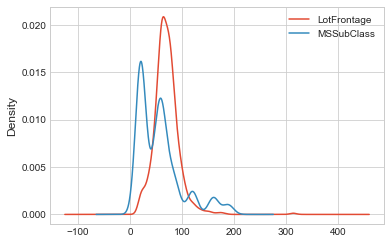

In [41]:
s = df[{'LotFrontage','MSSubClass'}]
ax = s.plot.kde()

In [54]:
x = MissingDataImputer_Numerical(strategy = 'Random',variables = ['LotFrontage'])
x.fit(train_data)
print(x.param_dict_)

{'LotFrontage': 0        65.0
1        85.0
2        84.0
3        60.0
4        73.0
        ...  
1455     62.0
1456     56.0
1457     66.0
1458    152.0
1459     61.0
Name: LotFrontage, Length: 1460, dtype: float64}


In [55]:
x.transform(Imputed_train_data_random)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_missing
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,20,RL,85.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,84.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,73.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,56.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,1
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0
1458,1459,20,RL,152.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,1


In [60]:
Imputed_train_data_mean.rename(columns = {'LotFrontage':'LotFrontage_mean'}, inplace = True) 

In [64]:
result = pd.merge(train_data,Imputed_train_data_mean[['LotFrontage_mean']], on='Id',how='left')
result.head()

KeyError: 'Id'

In [ ]:
import matplotlib.pyplot as plt
x = [10,20,30,40,50,60,70,80,90,100]
# create an index for each tick position
xi = list(range(len(x)))
y = [0.945,0.885,0.893,0.9,0.996,1.25,1.19]
plt.ylim(0.8,1.4)
# plot the index for the x-values
plt.plot(xi, y, marker='o', linestyle='--', color='r', label='Square') 
plt.xlabel('x')
plt.ylabel('y') 
plt.xticks(xi, x)
plt.title('compare')
plt.legend() 
plt.show()

In [37]:
print(train_data['LotFrontage'].describe())
print("\n..Mean Imputed \n]\n",Imputed_train_data_mean['LotFrontage'].describe())
print("\n..Mean Imputed \n]\n",Imputed_train_data_median['LotFrontage'].describe())
print("\n..Mean Imputed \n]\n",Imputed_train_data_random['LotFrontage'].describe())

count    1024.000000
mean       70.031250
std        24.640465
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

..Mean Imputed 
]
 count    1460.000000
mean       70.031250
std        20.632842
min        21.000000
25%        60.000000
50%        70.031250
75%        75.000000
max       313.000000
Name: LotFrontage, dtype: float64

..Mean Imputed 
]
 count    1460.000000
mean       69.723288
std        20.638243
min        21.000000
25%        60.000000
50%        69.000000
75%        75.000000
max       313.000000
Name: LotFrontage, dtype: float64

..Mean Imputed 
]
 count    1460.000000
mean       70.282192
std        26.255346
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


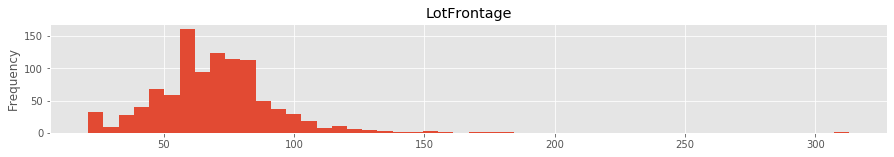

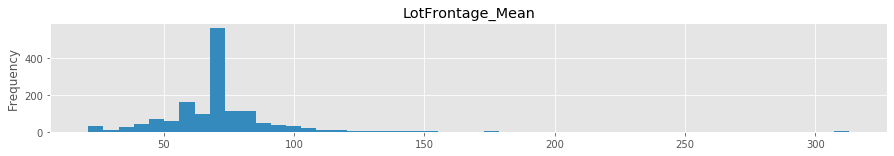

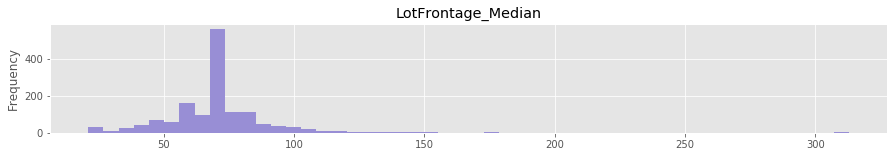

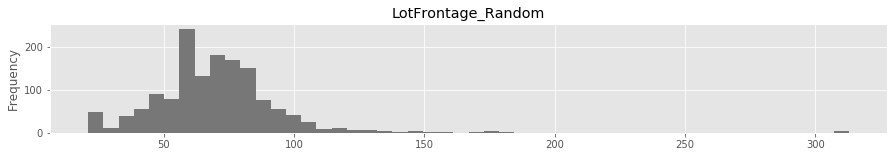

In [38]:
color_idx=0
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
train_data['LotFrontage'].plot(kind='hist',
                              title='LotFrontage',
                              bins=50,
                              figsize=(15, 2),
                              color=color_pal[color_idx])
        
color_idx += 1
plt.show()
Imputed_train_data_mean['LotFrontage'].plot(kind='hist',
                              title='LotFrontage_Mean',
                              bins=50,
                              figsize=(15, 2),
                              color=color_pal[color_idx])
        
color_idx += 1

plt.show()
Imputed_train_data_median['LotFrontage'].plot(kind='hist',
                              title='LotFrontage_Median',
                              bins=50,
                              figsize=(15, 2),
                              color=color_pal[color_idx])
        
color_idx += 1

plt.show()
plt.show()
Imputed_train_data_random['LotFrontage'].plot(kind='hist',
                              title='LotFrontage_Random',
                              bins=50,
                              figsize=(15, 2),
                              color=color_pal[color_idx])
        
color_idx += 1

plt.show()

Numeric X Categorical 

In [43]:
class MissingDataImputer_Categorical():
    '''
    Parameters:
    '''
    param_dict_ = {}
    def __init__ (self, strategy, variables, Constant=None):
        self.strategy = strategy
        self.variables = variables
        self.Constant = Constant
        
    def fit(self, df):        
     
        if self.strategy =='mode':
            for i in self.variables:
                value = max(df[i].mode())
                self.param_dict_[i]= value
    
        
        if self.strategy == 'Random':        
            for i in self.variables:
                value = df[i].apply(lambda x: np.random.choice(df[i].dropna().values) if pd.isnull(x) else x)
                self.param_dict_[i]= value

        if self.strategy == 'Constant':        
            for i in self.variables:
                value = self.Constant
                self.param_dict_[i]= value
                                
               
        return self
    
    def transform(self,df):        
        for var in self.param_dict_:
            df[str(var) +"_missing"] = df[var].isnull().map({False:0, True: 1})
            df[var].fillna(self.param_dict_[var],inplace=True)
        return df

In [44]:
cat_train_data_mode=train_data.copy()
cat_train_data_random=train_data.copy()

In [45]:
x = MissingDataImputer_Categorical(strategy = 'Random',variables = ['Fence'])
x.fit(train_data)
print(x.param_dict_)

{'Fence': 0       MnPrv
1       MnPrv
2       GdPrv
3       MnPrv
4       GdPrv
        ...  
1455    MnPrv
1456    MnPrv
1457    GdPrv
1458    GdPrv
1459    MnPrv
Name: Fence, Length: 1460, dtype: object}


In [46]:
x.transform(cat_train_data_random)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Fence_missing
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,NaN,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdPrv,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,NaN,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdPrv,NaN,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,8,2007,WD,Normal,175000,1
1456,1457,20,RL,NaN,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0
1458,1459,20,RL,NaN,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,4,2010,WD,Normal,142125,1


In [47]:
x = MissingDataImputer_Categorical(strategy = 'mode',variables = ['Fence'])
x.fit(train_data)
print(x.param_dict_)

{'Fence': 'MnPrv'}


In [48]:
x.transform(cat_train_data_mode)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Fence_missing
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,NaN,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,NaN,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,8,2007,WD,Normal,175000,1
1456,1457,20,RL,NaN,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0
1458,1459,20,RL,NaN,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,4,2010,WD,Normal,142125,1


Numeric X Target

Categorical Value Imputation


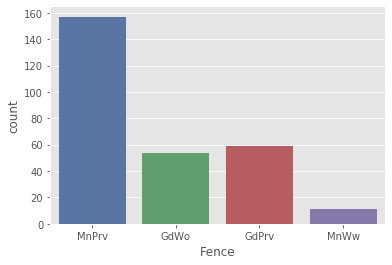

In [49]:
sns.countplot(x='Fence',data=train_data )

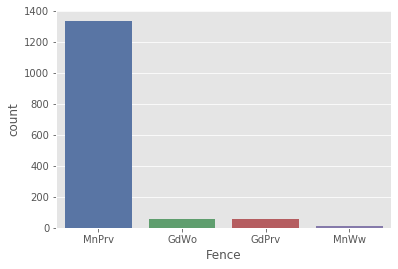

In [50]:
sns.countplot(x='Fence',data=cat_train_data_mode )

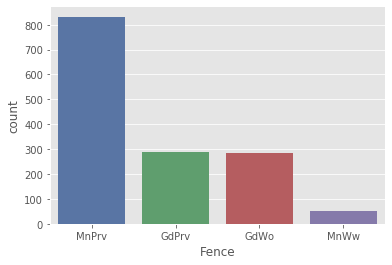

In [51]:
sns.countplot(x='Fence',data=cat_train_data_random)